In [5]:
pip install pymongo

In [6]:
import pandas as pd
import numpy as np
from datetime import datetime, time
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
import pymongo
import missingno as msno
from datetime import timedelta, datetime
import matplotlib.pyplot

In [2]:
courses = pd.read_csv('courses.csv', index_col=0)
course_c = pd.read_csv('course_contents.csv')
prog = pd.read_csv('progresses.csv')
prog_p = pd.read_csv('progress_phases.csv')

In [3]:
courses.columns = ['course_id','title','field']
df1=courses.merge(course_c, on = 'course_id', how='left')

In [4]:
prog.columns = ['progress_id', 'student_id', 'course_id']
df2 = prog.merge(prog_p, on='progress_id', how='left')

In [5]:
data = pd.merge(df1, df2, on = ['module_number', 'lesson_number', 'course_id', ], how ='left')
data

,course_id,title,field,module_number,module_title,lesson_number,lesson_title,lesson_token,is_video,is_homework,progress_id,student_id,status,start_date,finish_date
0,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,1,Вводный модуль,1,Какие бывают программы,cf394764-8850-4a0a-8d02-03470fe5345c,True,False,45cdf025b87db75e84f93c4ac3ccb5c7,0b4656b84ca60350583f8fbe236dda86,done,2019-03-29 17:02:32.838469+00,2019-04-13 17:32:19.134874+00
1,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,1,Вводный модуль,1,Какие бывают программы,cf394764-8850-4a0a-8d02-03470fe5345c,True,False,0c56109dde49080e7441e95b22bb73c2,1d874e6b6bdc34559781f65f9f761791,done,2019-06-13 19:22:19.331201+00,2019-06-13 19:51:21.987534+00
2,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,1,Вводный модуль,1,Какие бывают программы,cf394764-8850-4a0a-8d02-03470fe5345c,True,False,36079c0615d85f3cebfa47542b43ab41,ab7f5c720e3a5e1de00c2cdbef19fbf0,done,2019-03-27 06:56:51.138795+00,2019-03-27 06:56:54.834751+00
3,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,1,Вводный модуль,1,Какие бывают программы,cf394764-8850-4a0a-8d02-03470fe5345c,True,False,37384cbeb141835cc61b5fd22abd9200,29ab3f8c52a858bea2d3b9a51c433578,done,2019-05-28 11:09:29.320478+00,2019-05-29 06:47:21.794092+00
4,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,1,Вводный модуль,1,Какие бывают программы,cf394764-8850-4a0a-8d02-03470fe5345c,True,False,3a79d622c4057c1c029c74e282e43396,72afe01498ba14045467fc32029b650c,done,2019-03-24 07:03:03.582679+00,2019-03-24 09:50:32.595199+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350673,6e4837f0a65c68efbfdd0594d6774701,Java-разработчик,Development,17,Итоговая тема,1,Экзаменационная работа,8c7e7ee4-8141-47f5-a3b4-57a82c4c345c,False,True,f507e59fe8d11a05e82c5143f8b11778,d905eb5ec9a1288f9a70944cf80f3537,start,2018-10-26 16:35:31.562597+00,NaN
350674,6e4837f0a65c68efbfdd0594d6774701,Java-разработчик,Development,17,Итоговая тема,1,Экзаменационная работа,8c7e7ee4-8141-47f5-a3b4-57a82c4c345c,False,True,6f6ffe4ee41520199529f53b20fc35e9,7f5bc676040d60ee638b94fd6d9fca53,start,2018-07-27 13:02:26.309088+00,NaN
350675,6e4837f0a65c68efbfdd0594d6774701,Java-разработчик,Development,17,Итоговая тема,1,Экзаменационная работа,8c7e7ee4-8141-47f5-a3b4-57a82c4c345c,False,True,66ff04d276a67a3db09ba1c5fa14b581,1e7f607c6c4e1449915ece32352ed58b,done,2019-03-23 11:59:16.101317+00,2019-03-23 11:59:20.423056+00
350676,6e4837f0a65c68efbfdd0594d6774701,Java-разработчик,Development,17,Итоговая тема,1,Экзаменационная работа,8c7e7ee4-8141-47f5-a3b4-57a82c4c345c,False,True,dd816a722f6d339329f278a58c35ae6b,70e8b38a4d3de9edb6fb4042a67171e3,start,2018-10-29 14:53:53.764514+00,NaN


In [7]:
students = pd.read_csv('students.csv')
students = students.drop(students.columns[0], axis='columns')
students.columns = ['student_id', 'city', 'birthday']
data2 = pd.merge(data, students, on = 'student_id', how ='left')

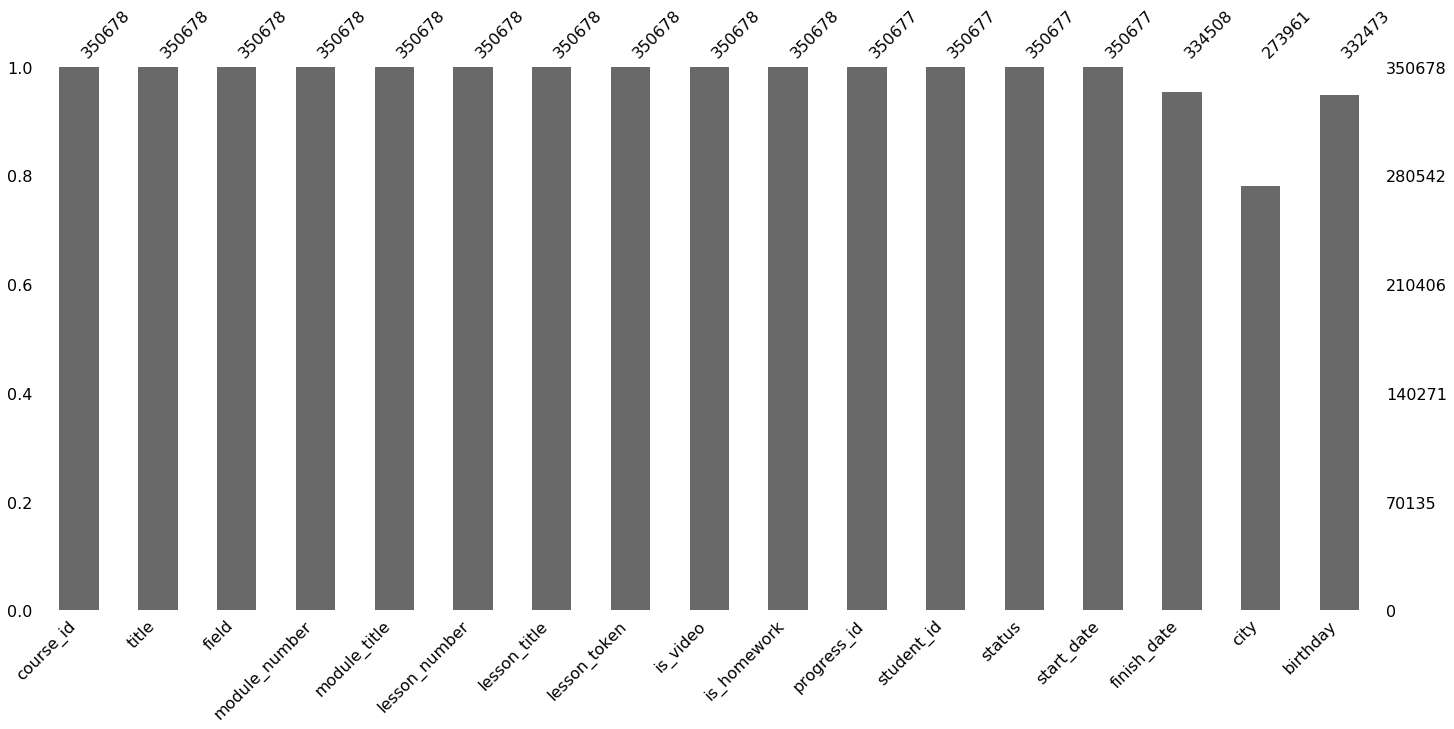

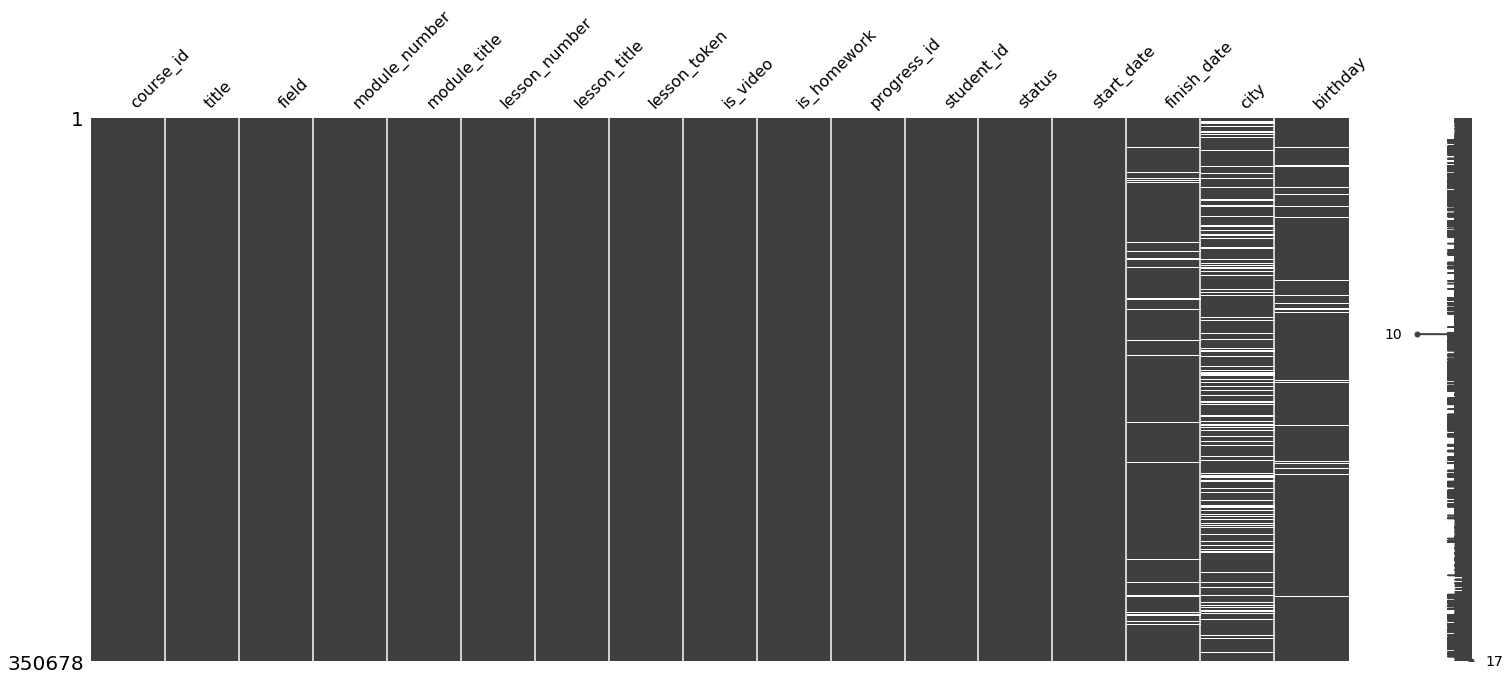

In [8]:
msno.bar(data2)
msno.matrix(data2)

In [9]:
data2.dtypes

course_id        object
title            object
field            object
module_number     int64
module_title     object
lesson_number     int64
lesson_title     object
lesson_token     object
is_video           bool
is_homework        bool
progress_id      object
student_id       object
status           object
start_date       object
finish_date      object
city             object
birthday         object
dtype: object

In [10]:
data['course_id'].nunique()

15

In [11]:
data.groupby('title').module_title.nunique()

title
Excel Базовый                           9
Java-разработчик                       17
Java-разработчик c нуля                 9
JavaScript с нуля                      18
PHP-разработчик с 0 до PRO. Часть 1     8
SMM-маркетолог от А до Я               11
UX-дизайн                              20
Анимация интерфейсов                   21
Веб-вёрстка для начинающих 2.0          8
Веб-дизайн PRO 2.0                     17
Веб-дизайн Базовый                     17
Веб-дизайн с нуля 2.0                  19
Веб-разработчик                        20
Интернет-маркетолог от Ingate          18
Руководитель digital-проектов          17
Name: module_title, dtype: int64

In [12]:
data.groupby(['title', 'module_title']).lesson_title.nunique()

title                          module_title                                       
Excel Базовый                   Визуализация данных Excel                              5
                               Основной функционал Excel                              11
                               Основной функционал Excel (продолжение)                 7
                               Сводные таблицы Excel                                   5
                               Формулы и функции Excel. Более сложные формулы          5
                                                                                      ..
Руководитель digital-проектов  Решение факапов. Lean/TOC. Обзор.                       5
                               Требовательность digital-продюсера                      4
                               Управление временем                                     4
                               Управление дизайнерами. Разработка дизайна по scrum     7
                           

In [13]:
data.groupby(['title', 'module_title']).lesson_title.nunique().groupby(['title']).median()

title
Excel Базовый                           5.0
Java-разработчик                        7.0
Java-разработчик c нуля                10.0
JavaScript с нуля                       7.0
PHP-разработчик с 0 до PRO. Часть 1     4.0
SMM-маркетолог от А до Я                6.0
UX-дизайн                               3.5
Анимация интерфейсов                    3.0
Веб-вёрстка для начинающих 2.0          7.0
Веб-дизайн PRO 2.0                      5.0
Веб-дизайн Базовый                      3.0
Веб-дизайн с нуля 2.0                   4.0
Веб-разработчик                         2.0
Интернет-маркетолог от Ingate           6.5
Руководитель digital-проектов           5.0
Name: lesson_title, dtype: float64

In [14]:
data.groupby('title').student_id.nunique()

title
Excel Базовый                           782
Java-разработчик                        763
Java-разработчик c нуля                 581
JavaScript с нуля                       966
PHP-разработчик с 0 до PRO. Часть 1     854
SMM-маркетолог от А до Я                506
UX-дизайн                              1151
Анимация интерфейсов                    598
Веб-вёрстка для начинающих 2.0         2004
Веб-дизайн PRO 2.0                     1711
Веб-дизайн Базовый                      518
Веб-дизайн с нуля 2.0                  2014
Веб-разработчик                         628
Интернет-маркетолог от Ingate          2168
Руководитель digital-проектов           685
Name: student_id, dtype: int64

In [15]:
data2.dropna(subset=['birthday'], inplace = True)

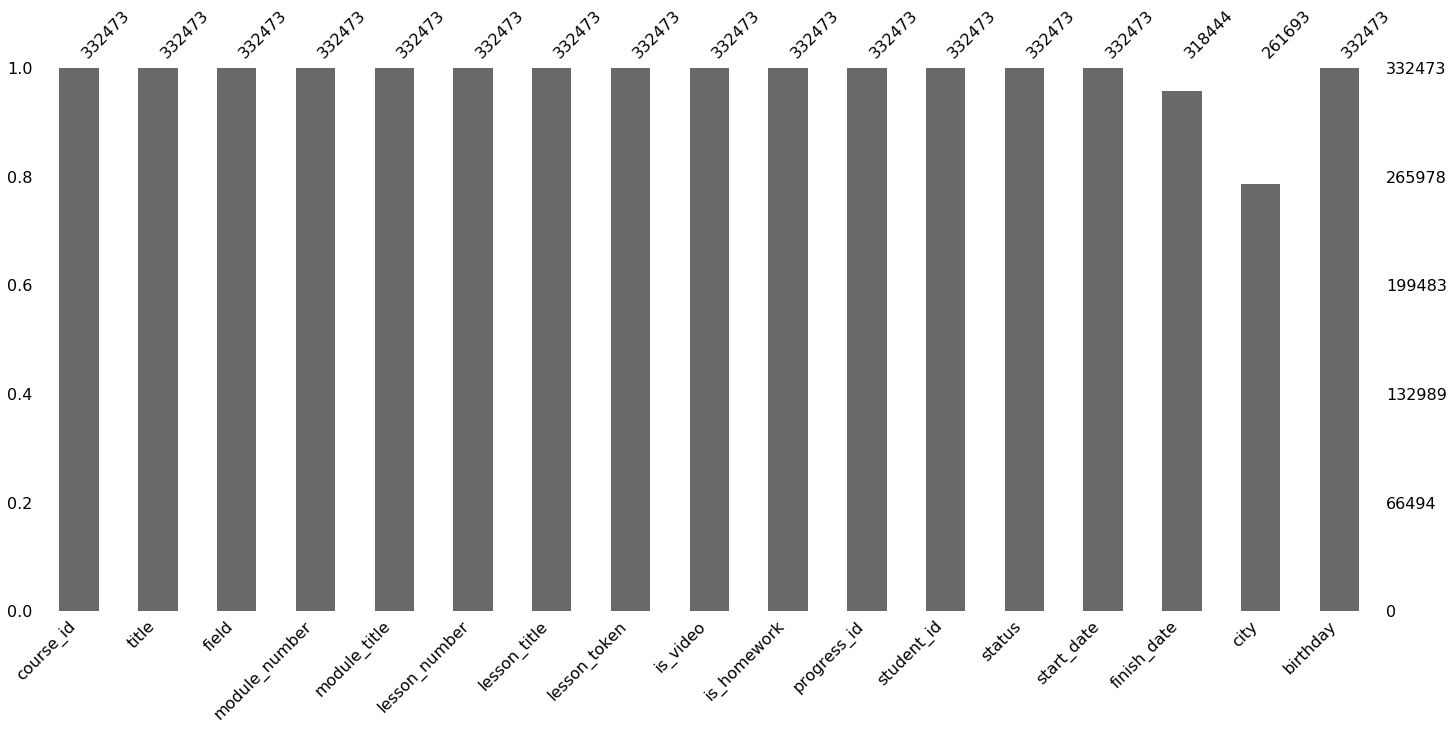

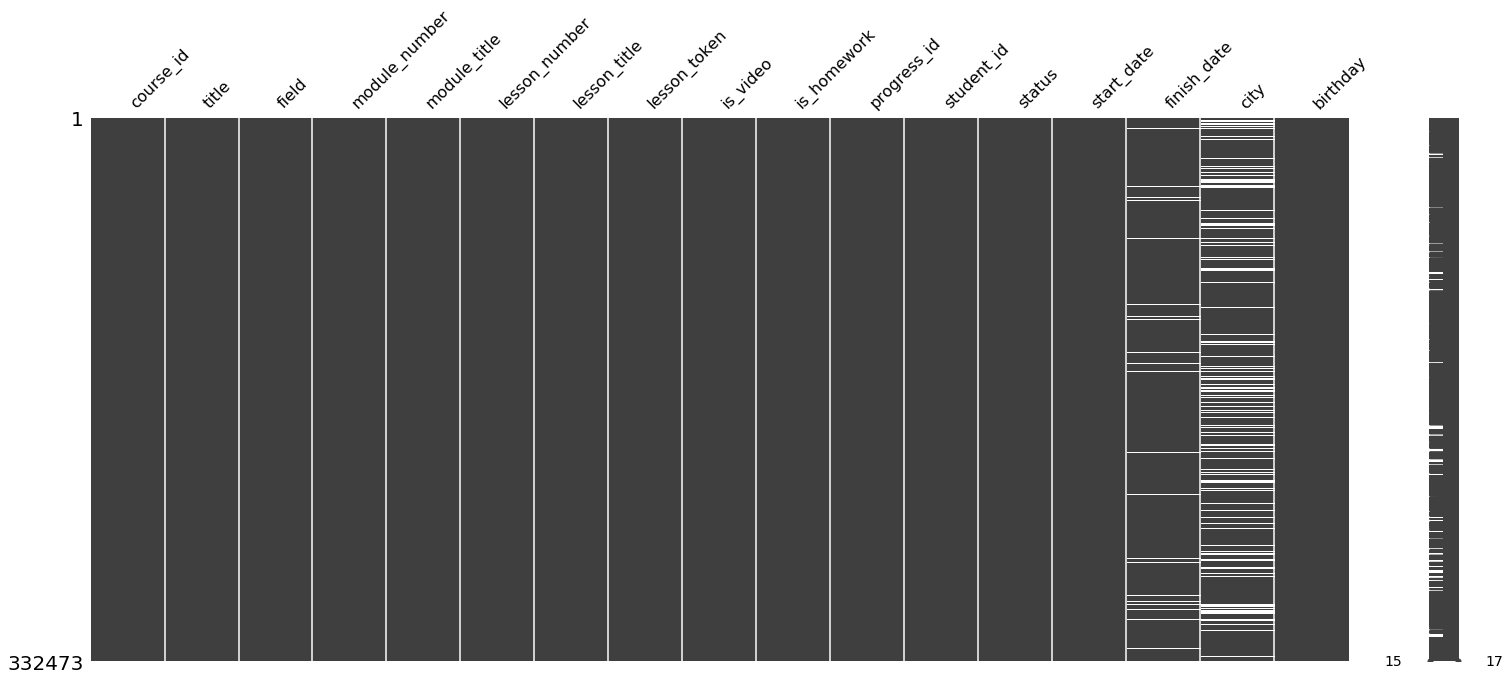

In [16]:
msno.bar(data2)
msno.matrix(data2)

In [17]:
data2['start_date']=pd.to_datetime(data2['start_date'],utc=True,  yearfirst=True, errors='coerce',format='%Y-%m-%d')
data2['finish_date']=pd.to_datetime(data2['finish_date'],utc=True,  yearfirst=True, errors='coerce',format='%Y-%m-%d')
data2['birthday']=pd.to_datetime(data2['birthday'],utc=True,  yearfirst=True, errors='coerce',format='%Y-%m-%d')


In [18]:
data2['age'] = round((data2['start_date'] - data2['birthday']).apply(lambda x: x/np.timedelta64(1,'Y')), 0)

In [19]:
data2 = data2[(data2['age'] >= 14.0) & (data2['age'] <= 80.0)]

In [20]:
data2['age'].agg(['min', 'max', 'mean'])

min     14.000000
max     75.000000
mean    28.743667
Name: age, dtype: float64

In [21]:
data2.groupby('title')['age'].agg(['min', 'max', 'mean'])

,min,max,mean
title,,,
Excel Базовый,15.0,60.0,32.270306
Java-разработчик,14.0,63.0,28.628172
Java-разработчик c нуля,14.0,54.0,29.326749
JavaScript с нуля,14.0,58.0,27.667477
PHP-разработчик с 0 до PRO. Часть 1,14.0,73.0,30.058602
SMM-маркетолог от А до Я,16.0,51.0,28.125738
UX-дизайн,14.0,57.0,29.071453
Анимация интерфейсов,14.0,50.0,28.667400
Веб-вёрстка для начинающих 2.0,14.0,59.0,27.741686


In [22]:
count_st = data2.groupby(['title', 'field'], as_index = False).agg({'student_id': 'count'}) \
                .sort_values('field', ascending = True)

count_st

,title,field,student_id
0,Excel Базовый,Business,17162
14,Руководитель digital-проектов,Business,14789
6,UX-дизайн,Design,20895
7,Анимация интерфейсов,Design,5454
9,Веб-дизайн PRO 2.0,Design,16811
10,Веб-дизайн Базовый,Design,13735
11,Веб-дизайн с нуля 2.0,Design,71853
1,Java-разработчик,Development,22696
2,Java-разработчик c нуля,Development,14277
3,JavaScript с нуля,Development,19325


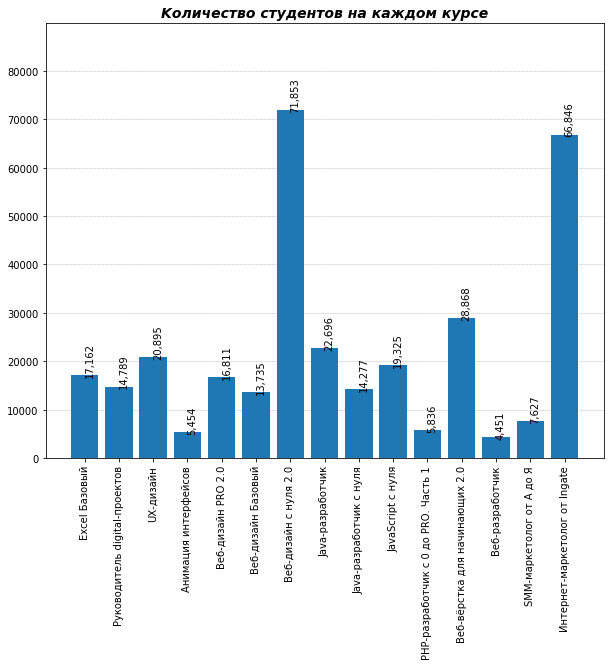

In [23]:
fig = plt.figure(figsize=(10,8)) 
ax= plt.subplot(111) 
ax.bar(count_st.title
       , count_st.student_id)
plt.xticks(rotation='vertical') 
for X,Y in enumerate(count_st.student_id): 
    ax.annotate("{:,}".format(Y)
                , xy=(X,Y)
                , rotation='vertical') 
ax.set_ylim(0, count_st.student_id.max()*1.25) 
ax.yaxis.grid(linestyle='--', linewidth=0.5) 
ax.set_axisbelow(True) 
ax.set_title('Kоличество студентов на каждом курсе', fontsize=14, weight ='bold', fontstyle='italic') 
plt.show()

In [24]:
st=data2.groupby(['title' ,'field']).student_id.count().unstack()
st

field,Business,Design,Development,Marketing
title,,,,
Excel Базовый,17162.0,NaN,NaN,NaN
Java-разработчик,NaN,NaN,22696.0,NaN
Java-разработчик c нуля,NaN,NaN,14277.0,NaN
JavaScript с нуля,NaN,NaN,19325.0,NaN
PHP-разработчик с 0 до PRO. Часть 1,NaN,NaN,5836.0,NaN
SMM-маркетолог от А до Я,NaN,NaN,NaN,7627.0
UX-дизайн,NaN,20895.0,NaN,NaN
Анимация интерфейсов,NaN,5454.0,NaN,NaN
Веб-вёрстка для начинающих 2.0,NaN,NaN,28868.0,NaN


In [25]:
count_st.student_id.median()

16811.0

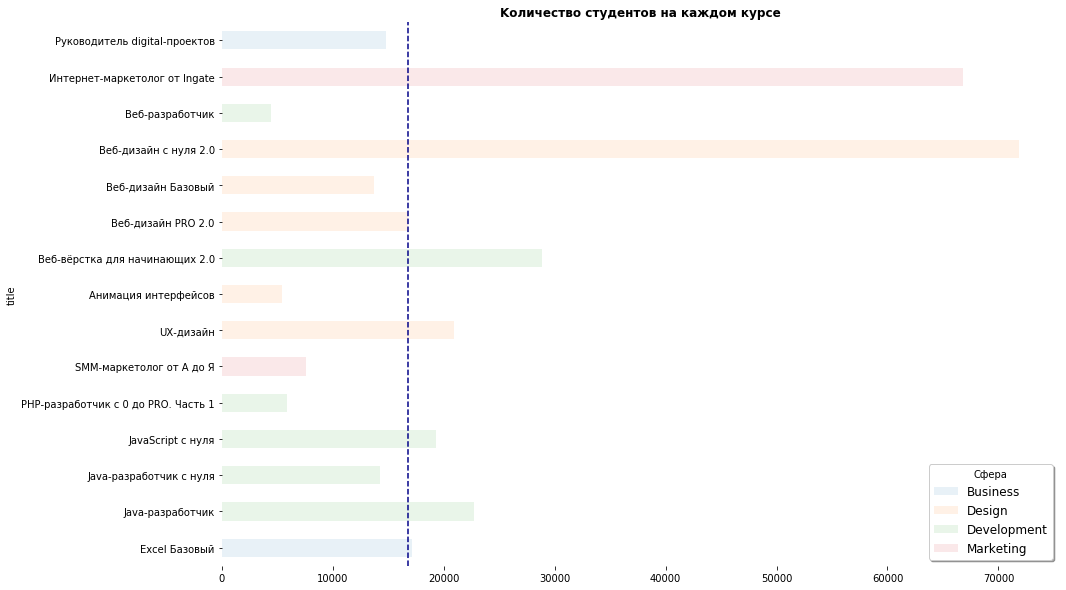

In [26]:
fig, ax = plt.subplots(figsize=(15,10))

ax = st.plot(kind='barh'
             , ax=ax
             , stacked=True
             , alpha=0.1)
plt.legend(loc='lower right'
           , title = "Сфера"
           , shadow = True
           , fontsize = 12) 
plt.axvline(x=count_st.student_id.median()
            , linestyle='--'
            , linewidth= 1.5
            , color = '#000088') 
plt.box(on=None)
ax.set_title('Kоличество студентов на каждом курсе'
             , fontsize=12
             , weight ='bold')

plt.show()